In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#parametrizer for the angle sweeping from pi to 0. It uses the Fermi-Dirac distribution, the smoothness of which dictates how long the simulation will
#spend around maximal neutron number density
def h(w,t,t_mid):
    delta_t = t - t_mid
    return np.pi/(1.0 + np.exp(delta_t/w))

def var_calc(x_1,x_2,x_3,y_1,y_2,y_3):
    A= np.array([[-1,0,1],[1,0,1],[0,-1,1]])
    b = np.array([x_1,
                x_2,
                x_3])
    x = np.linalg.solve(A,b)
    rx_cos = x[0]
    ry_sin = x[1]
    x_0 = x[2]

    b = np.array([y_1,
                y_2,
                y_3])
    x = np.linalg.solve(A,b)
    rx_sin = x[0]
    ry_cos = x[1]
    y_0 = x[2]

    return x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos

In [3]:
#define 3 points you wish the ellipse to pass through. _1 and _2 represent start and finish while _3 represents intermediate points
#Would also need to to define a density, could be profile (to be added later) or a constant
rho_0 = 1e+3 #g/cc
#T_9 scale
t9_1 = 0.125
t9_2 = 0.25
t9_3 = 0.3

#Exponent of the power of 10
nn_1_log = 2
nn_2_log = 2
nn_3_log = 9 

w = 1e+11 #smoothening factor
time = np.linspace(0,3.1536e+12,820)
t_mid = (3.1536e+12)/2.0

In [4]:
[x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos] = var_calc(t9_1,t9_2,t9_3,nn_1_log,nn_2_log,nn_3_log)
x_t = rx_cos*np.cos(h(w,time,t_mid)) - ry_sin*np.sin(h(w,time,t_mid)) + x_0
y_t = rx_sin*np.cos(h(w,time,t_mid)) - ry_cos*np.sin(h(w,time,t_mid)) + y_0 

print(rx_cos,rx_sin)
print(ry_sin,ry_cos)

0.0625 -0.0
-0.11249999999999999 -7.0


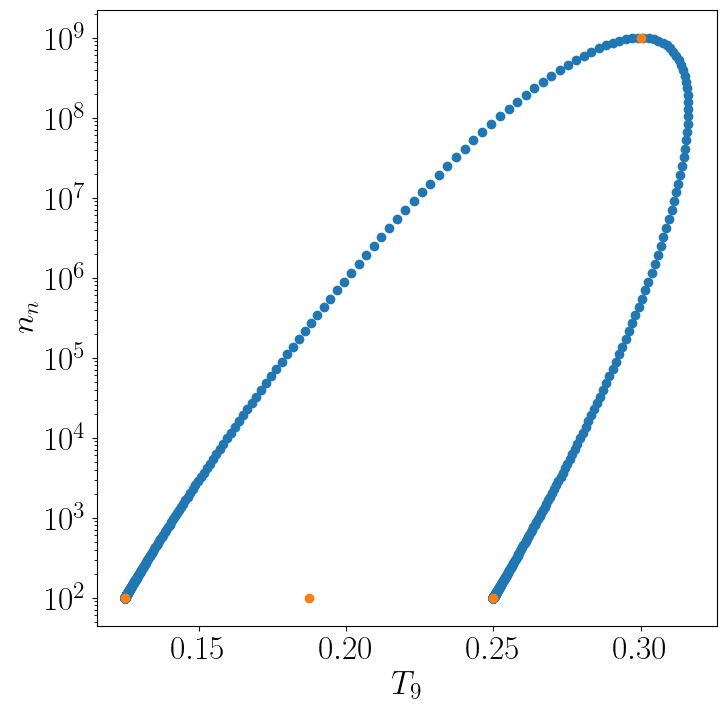

In [5]:
plt.figure(figsize =[8,8])
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rcParams['font.size']=24

plt.scatter(x_t,10**y_t)
t9 = np.array([x_0,t9_1,t9_2,t9_3])
n = np.array([y_0,nn_1_log,nn_2_log,nn_3_log])
plt.scatter(t9,10**n)
plt.yscale('log')
plt.ylabel(r'$n_{n}$')
plt.xlabel(r'$T_{9}$')
plt.savefig('single_param.png')
plt.show()

In [6]:
t_lin = np.linspace(3.1536e+12,3.2e+12)
slope = (nn_2_log - nn_1_log)/(t9_2 - t9_1)
intercept = nn_2_log - slope*t9_2

t9_lin = np.linspace(t9_2,t9_1)
n_lin = (slope*t9_lin + intercept)
x_t = np.append(x_t,t9_lin)
y_t = np.append(y_t,n_lin)

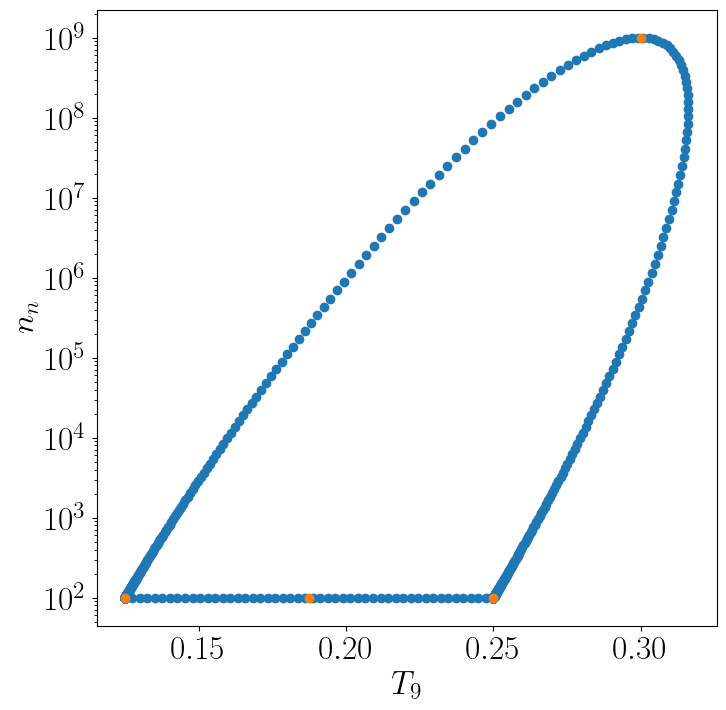

In [7]:
plt.figure(figsize =[8,8])
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif')
plt.rcParams['font.size']=24

plt.scatter(x_t,10**y_t)
t9 = np.array([x_0,t9_1,t9_2,t9_3])
n = np.array([y_0,nn_1_log,nn_2_log,nn_3_log])
plt.scatter(t9,10**n)
plt.yscale('log')
plt.ylabel(r'$n_{n}$')
plt.xlabel(r'$T_{9}$')
plt.savefig('single_pulse_with_return')
plt.show()

Loops

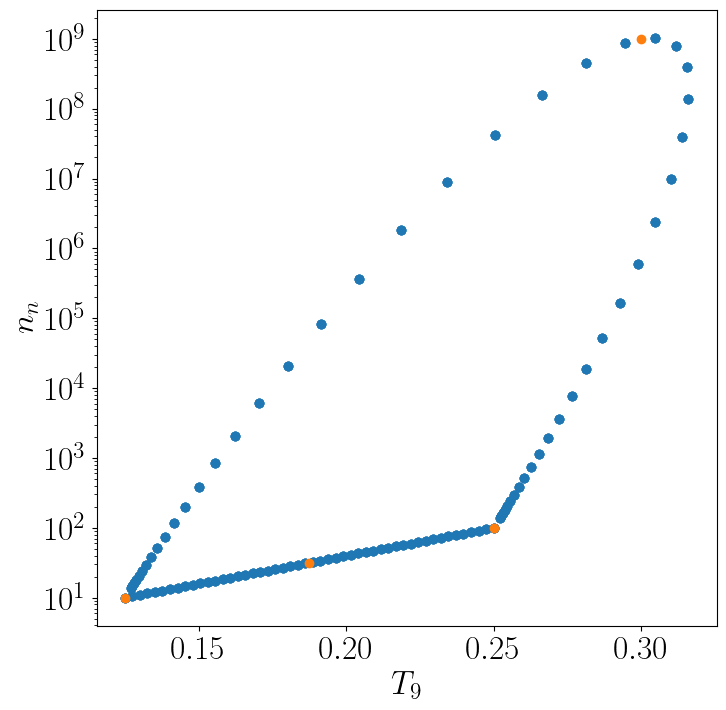

In [8]:
n_loops = 3
n_array = 50
#T_9 scale
t9_1 = 0.125
t9_2 = 0.25
t9_3 = 0.3

#Exponent of the power of 10
nn_1_log = 1
nn_2_log = 2
nn_3_log = 9 

t_start = 0
t_end = 3.1536e+12
t_loop = t_end/n_loops

w = 1e+11 #smoothening factor

t_pulse = 0.98*t_loop
t_return = 0.02*t_loop

t_mid = (t_pulse)/2.0

[x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos] = var_calc(t9_1,t9_2,t9_3,nn_1_log,nn_2_log,nn_3_log)

slope = (nn_2_log - nn_1_log)/(t9_2 - t9_1)
intercept = nn_2_log - slope*t9_2

x_t = np.array([])
y_t = np.array([])
time = np.array([])

time_loop = np.linspace(t_start,t_pulse,n_array)
time = np.append(time,time_loop)
x_t = np.append(x_t,rx_cos*np.cos(h(w,time_loop,t_mid)) - ry_sin*np.sin(h(w,time_loop,t_mid)) + x_0)
y_t = np.append(y_t,rx_sin*np.cos(h(w,time_loop,t_mid)) - ry_cos*np.sin(h(w,time_loop,t_mid)) + y_0)

time_return = np.linspace(t_pulse+1e+2,t_loop) 
time = np.append(time,time_return)
time_og = time
x_t = np.append(x_t, np.linspace(t9_2,t9_1))
y_t = np.append(y_t, slope*np.linspace(t9_2,t9_1) + intercept)

for i in range(1,n_loops):
    x_t = np.append(x_t,x_t)
    y_t = np.append(y_t,y_t)
    time = np.append(time,i*t_loop + time_og)

    
plt.figure(figsize =[8,8])

plt.scatter(x_t,10**y_t)
t9 = np.array([x_0,t9_1,t9_2,t9_3])
n = np.array([y_0,nn_1_log,nn_2_log,nn_3_log])
plt.scatter(t9,10**n)
#plt.scatter(t9_lin,n_lin)
plt.yscale('log')
plt.ylabel(r'$n_{n}$')
plt.xlabel(r'$T_{9}$')

plt.show()


In [9]:
fig = plt.figure()

def update_fig(i):
    fig.clear()
    fig.suptitle(r'time(s): %8.2e' %(time[i]))
    
    plt.scatter(x_t,10**y_t)
    plt.scatter(x_t[i],10**y_t[i],marker = 'x',color = 'red')
    plt.scatter(t9,10**n)
    plt.yscale('log')
    plt.draw()

anim = animation.FuncAnimation(fig,update_fig,len(time))
display(HTML(anim.to_jshtml()))
plt.close()


In [10]:
'''
rho_0 = rho_0*np.ones(len(time))
traj_data = np.column_stack((time,x_t,rho_0))
np.savetxt('traj.txt',traj_data)

x_n = (10.0**y_t)/(rho_0*6.0221409e+23)
frac_data = np.column_stack((time,x_n))
np.savetxt('t_xn.txt',frac_data)

data = np.column_stack((time,x_t,10**y_t))
np.savetxt('data_1.txt',data)
'''

"\nrho_0 = rho_0*np.ones(len(time))\ntraj_data = np.column_stack((time,x_t,rho_0))\nnp.savetxt('traj.txt',traj_data)\n\nx_n = (10.0**y_t)/(rho_0*6.0221409e+23)\nfrac_data = np.column_stack((time,x_n))\nnp.savetxt('t_xn.txt',frac_data)\n\ndata = np.column_stack((time,x_t,10**y_t))\nnp.savetxt('data_1.txt',data)\n"

Shifted loop

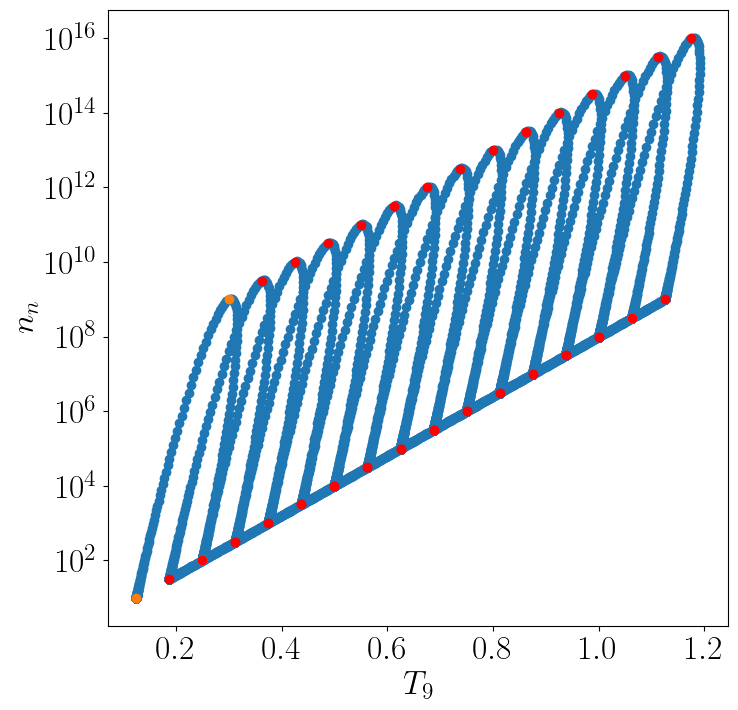

In [11]:
n_loops = 15
n_array = 500
#T_9 scale
t9_1_0 = 0.125
t9_2_0 = 0.25
t9_3_0 = 0.3

#Exponent of the power of 10
nn_1_log_0 = 1
nn_2_log_0 = 2
nn_3_log_0 = 9 

t_start = 0
t_end = 3.1536e+12
t_loop = t_end

w = 1e+11 #smoothening factor

t_pulse = 0.98*t_loop
t_return = 0.02*t_loop

t_mid = (t_pulse)/2.0

[x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos] = var_calc(t9_1_0,t9_2_0,t9_3_0,nn_1_log_0,nn_2_log_0,nn_3_log_0)

slope12 = (nn_2_log_0 - nn_1_log_0)/(t9_2_0 - t9_1_0)
slope13 = (nn_3_log_0 - nn_1_log_0)/(t9_3_0 - t9_1_0)
intercept12 = nn_2_log_0 - slope12*t9_2_0
intercept13 = nn_1_log_0 - slope13*t9_1_0

d13 = ((t9_1_0 - t9_3_0)**2 + (nn_1_log_0 - nn_3_log_0)**2)**(1/2)
d12 = ((t9_2_0 - t9_1_0)**2 + (nn_1_log_0 - nn_2_log_0)**2)**(1/2)

x_t = np.array([])
y_t = np.array([])
time = np.array([])

time_loop = np.linspace(t_start,t_pulse,n_array)
time = np.append(time,time_loop)
x_t = np.append(x_t,rx_cos*np.cos(h(w,time_loop,t_mid)) - ry_sin*np.sin(h(w,time_loop,t_mid)) + x_0)
y_t = np.append(y_t,rx_sin*np.cos(h(w,time_loop,t_mid)) - ry_cos*np.sin(h(w,time_loop,t_mid)) + y_0)

time_return = np.linspace(t_pulse+1e+2,t_loop) 
time = np.append(time,time_return)
time_og = time

x_t = np.append(x_t, np.linspace(t9_2_0,x_0))
y_t = np.append(y_t, slope12*np.linspace(t9_2_0,x_0) + intercept12)

t9_new = []
nn_new = []
for i in range(1,n_loops):
    t = i*t_loop + time_og
    
    t1 = x_0
    n1 = y_0

    t2 = t1 + d12/(1 + slope12**2)**(1/2)
    n2 = slope12*t2 + intercept12

    t3 = t1 + d13/(1 + slope13**2)**(1/2)
    b = n1 - slope13*t1
    n3 = slope13*t3 + b

    [x_0,y_0,rx_cos,ry_sin,rx_sin,ry_cos] = var_calc(t1,t2,t3,n1,n2,n3)

    xnew = rx_cos*np.cos(h(w,time_loop,t_mid)) - ry_sin*np.sin(h(w,time_loop,t_mid)) + x_0
    ynew = rx_sin*np.cos(h(w,time_loop,t_mid)) - ry_cos*np.sin(h(w,time_loop,t_mid)) + y_0

    x_t = np.append(x_t,xnew)
    y_t = np.append(y_t,ynew)

    x_t = np.append(x_t, np.linspace(t2,x_0))
    y_t = np.append(y_t, slope12*np.linspace(t2,x_0) + intercept12)

    time = np.append(time,t)
    t9_new = np.append(t9_new,[t1,t2,t3])
    nn_new = np.append(nn_new,[n1,n2,n3])

    
plt.figure(figsize =[8,8])

plt.scatter(x_t,10**y_t)
t9 = np.array([x_0,t9_1_0,t9_2_0,t9_3_0])
n = np.array([y_0,nn_1_log_0,nn_2_log_0,nn_3_log_0])
plt.scatter(t9,10**n)
plt.scatter(t9_new,10**nn_new,color='red')
#plt.scatter(t9_lin,n_lin)
plt.yscale('log')
plt.ylabel(r'$n_{n}$')
plt.xlabel(r'$T_{9}$')
plt.savefig('shifted_pulse.png')
plt.show()


In [12]:
#anim.save('repeat.mp4')